In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:>

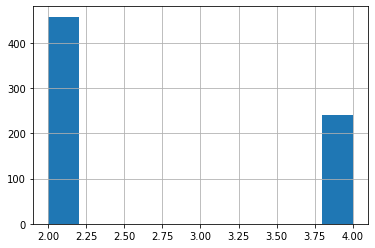

In [3]:
cell_df['Class'].hist()
#class: 2 --> benign, 4 --> malignant

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

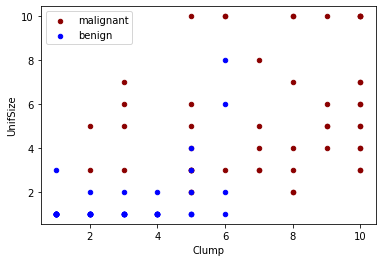

In [4]:
splot = cell_df[cell_df['Class']==4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkRed', label='malignant')
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='benign', ax=splot)

In [5]:
#check datatypes
print(cell_df.columns)
cell_df.dtypes

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
#check for missing values
cell_df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [7]:
#correction for missing values
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df['BareNuc'].value_counts()


1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [8]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
cell_df.head()
"""
scaled_features = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
""" 

"\nscaled_features = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]\n"

In [9]:
#Xs
feature_df = scaled_features
X = np.asanyarray(feature_df)
X[0:5]

array([[ 0.19790469, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299,  0.75803177,  1.69516613,
         1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [ 0.55267873,  1.58320366,  1.6021918 , -0.63936553, -0.10545357,
         0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.15686934, -0.70221201, -0.74177362,  0.05933312, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

In [10]:
#Ys
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asanyarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [11]:
#train/test split‌
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [12]:
#svm
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [13]:
#predictions
y_pred = clf.predict(X_test)
y_pred

array([2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4,
       4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 4, 4])

In [14]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9562043795620438


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[73  5]
 [ 1 58]]


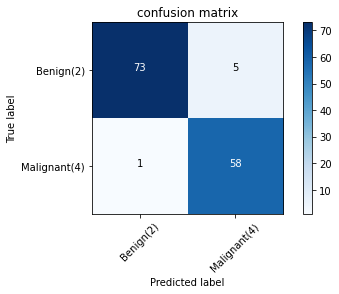

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize=False,  title='confusion matrix')


In [17]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9563460823891725

In [18]:
#jaccard similarity index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred,pos_label=2)

0.9240506329113924